**The code in this file is for data clean-up only**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# I found this piece of code that essentially does not print warnings. I was coming across some clutter in codes below, and I toggled this code on and off as needed. 
# Link to code: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

shots_data = files.upload()

Saving NBA Shot Locations 1997 - 2020.csv to NBA Shot Locations 1997 - 2020.csv


In [ ]:
import io
shots = pd.read_csv(io.BytesIO(shots_data['NBA Shot Locations 1997 - 2020.csv']))

In [ ]:
shots.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [ ]:
# Creating a DataFrame of games only in the 2019-2020 season
# This season was shortened due to COVID-19 outbreak

shots = shots[shots['Game Date']>=20190731]

In [ ]:
# Dropping columns that won't be used

shots.drop('Game Event ID',axis=1,inplace=True)
shots.drop('Seconds Remaining',axis=1,inplace=True)
shots.drop('Shot Zone Range',axis=1,inplace=True)


In [ ]:
# Convert Shot Type to drop all text and only keep integer value

shots['Shot Type']=shots['Shot Type'].str.slice(0,1)
shots['Shot Type']=pd.to_numeric(shots['Shot Type'])


In [ ]:
shots.head()

,Game ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
4274646,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,1,2,Jump Shot,3,Above the Break 3,Right Side Center(RC),24,204,142,1,20191023,CHA,CHI,Regular Season
4274647,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,1,1,Floating Jump shot,2,In The Paint (Non-RA),Center(C),8,24,82,1,20191023,CHA,CHI,Regular Season
4274648,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,2,10,Floating Jump shot,2,Mid-Range,Left Side(L),14,-135,62,0,20191023,CHA,CHI,Regular Season
4274649,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,3,4,Jump Shot,3,Right Corner 3,Right Side(R),23,232,31,1,20191023,CHA,CHI,Regular Season
4274650,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,3,4,Jump Shot,3,Above the Break 3,Left Side Center(LC),28,-190,215,1,20191023,CHA,CHI,Regular Season


In [ ]:
shots = shots.to_csv('2019_NBA_ShotData.csv')

In [ ]:
from google.colab import files

files.download('2019_NBA_ShotData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import io

shots = pd.read_csv('2019_NBA_ShotData.csv')

In [ ]:
shots.head()

,Unnamed: 0,Game ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,4274646,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,1,2,Jump Shot,3,Above the Break 3,Right Side Center(RC),24,204,142,1,20191023,CHA,CHI,Regular Season
1,4274647,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,1,1,Floating Jump shot,2,In The Paint (Non-RA),Center(C),8,24,82,1,20191023,CHA,CHI,Regular Season
2,4274648,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,2,10,Floating Jump shot,2,Mid-Range,Left Side(L),14,-135,62,0,20191023,CHA,CHI,Regular Season
3,4274649,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,3,4,Jump Shot,3,Right Corner 3,Right Side(R),23,232,31,1,20191023,CHA,CHI,Regular Season
4,4274650,21900003,101107,Marvin Williams,1610612766,Charlotte Hornets,3,4,Jump Shot,3,Above the Break 3,Left Side Center(LC),28,-190,215,1,20191023,CHA,CHI,Regular Season


In [ ]:
# Creating a DataFrame of only 2019-2020 OKC Thunder shots

OKC = shots[shots['Team Name'] == 'Oklahoma City Thunder']

In [ ]:
OKC = OKC.to_csv('2019_OKC_ShotData.csv')


In [ ]:
from google.colab import files
files.download('2019_OKC_ShotData.csv')

# end data clean up

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**START HERE**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
OKC = files.upload()

Saving 2019_OKC_ShotData.csv to 2019_OKC_ShotData.csv


In [ ]:
import io
OKC = pd.read_csv(io.BytesIO(OKC['2019_OKC_ShotData.csv']))

In [ ]:
# Dropping unneeded indexes created by Python during import

OKC.drop('Unnamed: 0',axis=1,inplace=True)
OKC.drop('Unnamed: 0.1',axis=1,inplace=True)
OKC.head()

,Game ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,21900011,101108,Chris Paul,1610612760,Oklahoma City Thunder,1,9,Pullup Jump shot,2,Mid-Range,Right Side(R),12,92,85,0,20191023,UTA,OKC,Regular Season
1,21900011,101108,Chris Paul,1610612760,Oklahoma City Thunder,1,8,Step Back Jump shot,2,In The Paint (Non-RA),Center(C),7,40,68,1,20191023,UTA,OKC,Regular Season
2,21900011,101108,Chris Paul,1610612760,Oklahoma City Thunder,1,0,Step Back Jump shot,2,In The Paint (Non-RA),Center(C),11,54,96,1,20191023,UTA,OKC,Regular Season
3,21900011,101108,Chris Paul,1610612760,Oklahoma City Thunder,2,11,Jump Shot,3,Above the Break 3,Center(C),31,35,314,1,20191023,UTA,OKC,Regular Season
4,21900011,101108,Chris Paul,1610612760,Oklahoma City Thunder,2,10,Step Back Jump shot,3,Above the Break 3,Center(C),25,47,253,1,20191023,UTA,OKC,Regular Season


In [ ]:
# Total Points Scored by OKC

OKCMadeShots=OKC[OKC['Shot Made Flag']==1]
TotalPoints=OKCMadeShots.groupby('Player Name').sum()
TotalPoints.pivot_table('Shot Type',index='Player Name',sort=True)

,Shot Type
Player Name,
Abdel Nader,239
Chris Paul,889
Danilo Gallinari,823
Darius Bazley,206
Dennis Schroder,1006
Deonte Burton,88
Devon Hall,2
Hamidou Diallo,205
Justin Patton,9


In [ ]:
# Basic shot zones unique values

OKC['Shot Zone Basic'].unique()

array(['Mid-Range', 'In The Paint (Non-RA)', 'Above the Break 3',
       'Right Corner 3', 'Restricted Area', 'Left Corner 3', 'Backcourt'],
      dtype=object)

In [ ]:
# Adding a function to calculate shooting percentages per shot zone

def PlayerShootingPercentage(player):
  """
  Calculate Attempts
  Calculate Makes
  Caluclate FG%
  """
  ABA = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
  RCA = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
  LCA = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
  All3PA = ABA+RCA+LCA
  ABM = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
  RCM = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
  LCM = OKC[OKC['Player Name']==player][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
  All3PM = ABM+RCM+LCM

  player_3PPercent = All3PM/All3PA*100

  return print(player, "shot {}% from 3 during the 2019-2020 season.".format(round(player_3PPercent['Shot Made Flag'],2)))

  


In [ ]:
PlayerShootingPercentage('Shai Gilgeous-Alexander')

Shai Gilgeous-Alexander shot 35.14% from 3 during the 2019-2020 season.


In [ ]:
PlayerShootingPercentage('Chris Paul')

Chris Paul shot 37.27% from 3 during the 2019-2020 season.


In [ ]:
# This cell of code will COUNT all of Shai Gilgeous-Alexander's 3 point ATTEMPTS stored in variables and then added together

# SGA 3 Point Above the Break attempts
SGA_AB_A = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
# SGA 3 Point Right Corner attempts
SGA_RC_A = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
# SGA 3 Point Left Corner attempts
SGA_LC_A = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
# SGA Total 3 Point attempts
SGA_3P_A = (SGA_AB_A + SGA_RC_A + SGA_LC_A)

print("Shai Gilgeous-Alexander attempted {} 3-pointers in the 2019-2020 season.".format(SGA_3P_A['Shot Zone Basic']))


Shai Gilgeous-Alexander attempted 222.0 3-pointers in the 2019-2020 season.


In [ ]:
# This cell of code will COUNT all of Shai-Gilgeous-Alexander's 3 point MAKES stored in variables

# SGA 3 Point Above the Break makes
SGA_AB_M = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
# SGA 3 Point Right Corner makes
SGA_RC_M = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
# SGA 3 Point Left Corner makes
SGA_LC_M = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)

# SGA total 3 point CORNER makes
SGA_3C_M = (SGA_RC_M + SGA_LC_M)

# SGA total 3 point makes (any shot zone)
SGA_3P_M = (SGA_AB_M + SGA_3C_M)

print("Shai Gilgeous-Alexander made", round(SGA_3P_M['Shot Zone Basic'],0),"3-pointers in the 2019-2020 season.")

Shai Gilgeous-Alexander made 78.0 3-pointers in the 2019-2020 season.


In [ ]:
# SGA 3P FG%

SGA_3PFG = SGA_3P_M/SGA_3P_A

print('Shai Gilgeous-Alexander shot {}% from 3-point range in the 2019-2020 season.'.format(round(SGA_3PFG['Shot Zone Basic']*100,2)))

Shai Gilgeous-Alexander shot 35.14% from 3-point range in the 2019-2020 season.


In [ ]:
# SGA Above the Break 3 eFG%

SGA_AB3_EFG = ((SGA_AB_M + (0.5*SGA_3P_M))/SGA_3P_A)

print("Shai Gilgeous-Alexander's effective field goal percentage from 3 point range above the break was {}% in the 2019-2020 season.".format(round(SGA_AB3_EFG['Shot Zone Basic']*100,2)))


Shai Gilgeous-Alexander's effective field goal percentage from 3 point range above the break was 46.85% in the 2019-2020 season.


In [ ]:
import matplotlib.patches as pat
from matplotlib.patches import Circle, Rectangle, Arc

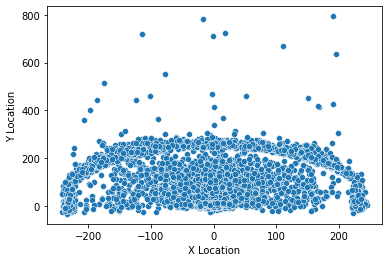

In [ ]:
# Scatter plot to show location of every shot taken by OKC in 2019-2020

sns.scatterplot(x=OKC['X Location'],y=OKC['Y Location'])

In [ ]:
# Create function and add elements to draw court diagram
# This piece of code was submitted to Clarke via email for approval since it is not my own. I found it using a google search for how to draw a basketball court in matplotlib since we didn't go over shapes.
# Source of this code: http://savvastjortjoglou.com/nba-shot-sharts.html

def draw_court(ax=None, color = 'Black', lw=2, outer_lines=False):
  if ax is None:
    ax = plt.gca()

  hoop = Circle((0,0),radius=7.5, linewidth=lw, color=color, fill = False)
  backboard = Rectangle((-30,-7.5),60,-1,linewidth=lw,color=color)
  outer_box = Rectangle((-80,-47.5),160,190,linewidth=lw,color=color,fill=False)
  inner_box = Rectangle((-60,-47.5),120,190,linewidth=lw,color=color,fill=False)
  top_free_throw = Arc((0,142.5),120,120,theta1=0,theta2=180,linewidth=lw,color=color,fill=False)
  bottom_free_throw = Arc((0,142.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color,linestyle='dashed')
  restricted = Arc((0,0),80,80,theta1=0,theta2=180,linewidth=lw,color=color)
  corner_three_a = Rectangle((-220,-47.5),0,140,linewidth=lw,color=color)
  corner_three_b = Rectangle((220,-47.5),0,140,linewidth=lw,color=color)
  three_arc = Arc((0,0),475,475,theta1=22,theta2=158,linewidth=lw,color=color)
  center_outer_arc = Arc((0,422.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color)
  center_inner_arc = Arc((0,422.5),40,40,theta1=180,theta2=0,linewidth=lw,color=color)

  court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, 
                    corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

  if outer_lines:
    outer_lines = Rectangle((-250,-47.5),500,470,linewidth=lw,color=color,fill=False)
    court_elements.append(outer_lines)

  for element in court_elements:
    ax.add_patch(element)

  return ax

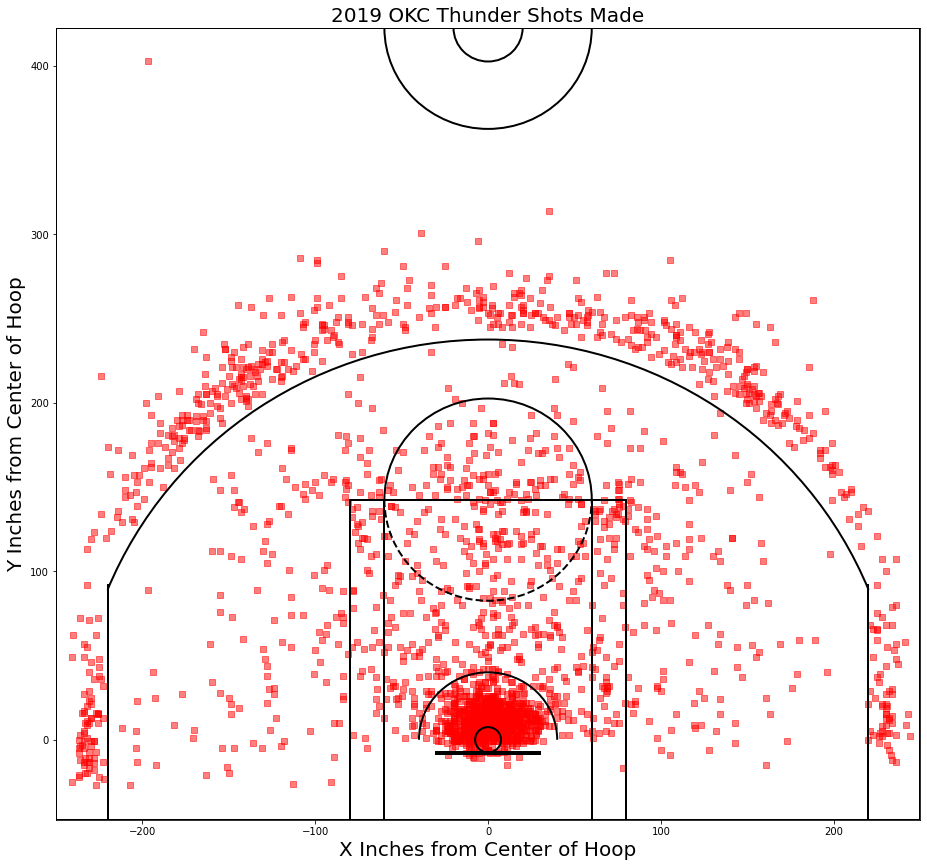

In [ ]:
# Plot OKC shots + court diagram

fig=plt.figure(figsize=(12,11))
OKCShots=fig.add_axes([0,0,1,1])
plt.scatter(OKCMadeShots['X Location'],OKCMadeShots['Y Location'],marker="s",alpha=.5,color='red')
draw_court(outer_lines=True)
plt.xlim(-250,250)
plt.ylim(-47.5,422.5)
OKCShots.set_title('2019 OKC Thunder Shots Made',fontsize=20)
OKCShots.set_xlabel('X Inches from Center of Hoop',fontsize=20)
OKCShots.set_ylabel('Y Inches from Center of Hoop',fontsize=20)

plt.show()

In [ ]:
# Basic shot zones unique values

ShotZones = OKC['Shot Zone Basic'].unique()
ShotZones

array(['Mid-Range', 'In The Paint (Non-RA)', 'Above the Break 3',
       'Right Corner 3', 'Restricted Area', 'Left Corner 3', 'Backcourt'],
      dtype=object)

In [ ]:
# Chris Paul made shots for each zone

# Mid-Range
CP_MR_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_MR_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
CP_MR_ShotsAttempted = CP_MR_ShotsAttempted['Shot Made Flag']
CP_MR_ShotsMade = CP_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
CP_ITP_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
CP_ITP_ShotsAttempted = CP_ITP_ShotsAttempted['Shot Made Flag']
CP_ITP_ShotsMade = CP_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
CP_ATB_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
CP_ATB_ShotsAttempted = CP_ATB_ShotsAttempted['Shot Made Flag']
CP_ATB_ShotsMade = CP_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
CP_RC_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_RC_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
CP_RC_ShotsAttempted = CP_RC_ShotsAttempted['Shot Made Flag']
CP_RC_ShotsMade = CP_RC_ShotsMade['Shot Made Flag']

# Restricted Area
CP_Rest_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
CP_Rest_ShotsAttempted = CP_Rest_ShotsAttempted['Shot Made Flag']
CP_Rest_ShotsMade = CP_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
CP_LC_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_LC_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
CP_LC_ShotsAttempted = CP_LC_ShotsAttempted['Shot Made Flag']
CP_LC_ShotsMade = CP_LC_ShotsMade['Shot Made Flag']

# Backcourt
CP_BC_ShotsMade = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
CP_BC_ShotsAttempted = OKC[OKC['Player Name']=='Chris Paul'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
CP_BC_ShotsAttempted = CP_BC_ShotsAttempted['Shot Made Flag']
CP_BC_ShotsMade = CP_BC_ShotsMade['Shot Made Flag']

CP_MR_Percent = CP_MR_ShotsMade / CP_MR_ShotsAttempted
CP_ITP_Percent = CP_ITP_ShotsMade / CP_ITP_ShotsAttempted
CP_ATB_Percent = CP_ATB_ShotsMade / CP_ATB_ShotsAttempted
CP_RC_Percent = CP_RC_ShotsMade / CP_RC_ShotsAttempted
CP_Rest_Percent = CP_Rest_ShotsMade / CP_Rest_ShotsAttempted
CP_LC_Percent = CP_LC_ShotsMade / CP_LC_ShotsAttempted
CP_BC_Percent = CP_BC_ShotsMade / CP_BC_ShotsAttempted


In [ ]:
# Abdel Nader made shots for each zone

# Mid-Range
AN_MR_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_MR_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
AN_MR_ShotsAttempted = AN_MR_ShotsAttempted['Shot Made Flag']
AN_MR_ShotsMade = AN_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
AN_ITP_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
AN_ITP_ShotsAttempted = AN_ITP_ShotsAttempted['Shot Made Flag']
AN_ITP_ShotsMade = AN_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
AN_ATB_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
AN_ATB_ShotsAttempted = AN_ATB_ShotsAttempted['Shot Made Flag']
AN_ATB_ShotsMade = AN_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
AN_RC_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_RC_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
AN_RC_ShotsAttempted = AN_RC_ShotsAttempted['Shot Made Flag']
AN_RC_ShotsMade = AN_RC_ShotsMade['Shot Made Flag']

# Restricted Area
AN_Rest_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
AN_Rest_ShotsAttempted = AN_Rest_ShotsAttempted['Shot Made Flag']
AN_Rest_ShotsMade = AN_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
AN_LC_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_LC_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
AN_LC_ShotsAttempted = AN_LC_ShotsAttempted['Shot Made Flag']
AN_LC_ShotsMade = AN_LC_ShotsMade['Shot Made Flag']

# Backcourt
AN_BC_ShotsMade = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
AN_BC_ShotsAttempted = OKC[OKC['Player Name']=='Abdel Nader'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
AN_BC_ShotsAttempted = AN_BC_ShotsAttempted['Shot Made Flag']
AN_BC_ShotsMade = AN_BC_ShotsMade['Shot Made Flag']

AN_MR_Percent = AN_MR_ShotsMade / AN_MR_ShotsAttempted
AN_ITP_Percent = AN_ITP_ShotsMade / AN_ITP_ShotsAttempted
AN_ATB_Percent = AN_ATB_ShotsMade / AN_ATB_ShotsAttempted
AN_RC_Percent = AN_RC_ShotsMade / AN_RC_ShotsAttempted
AN_Rest_Percent = AN_Rest_ShotsMade / AN_Rest_ShotsAttempted
AN_LC_Percent = AN_LC_ShotsMade / AN_LC_ShotsAttempted
AN_BC_Percent = AN_BC_ShotsMade / AN_BC_ShotsAttempted

In [ ]:
# Justin Patton made shots for each zone

# Mid-Range
JP_MR_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_MR_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
JP_MR_ShotsAttempted = JP_MR_ShotsAttempted['Shot Made Flag']
JP_MR_ShotsMade = JP_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
JP_ITP_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
JP_ITP_ShotsAttempted = JP_ITP_ShotsAttempted['Shot Made Flag']
JP_ITP_ShotsMade = JP_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
JP_ATB_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
JP_ATB_ShotsAttempted = JP_ATB_ShotsAttempted['Shot Made Flag']
JP_ATB_ShotsMade = JP_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
JP_RC_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_RC_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
JP_RC_ShotsAttempted = JP_RC_ShotsAttempted['Shot Made Flag']
JP_RC_ShotsMade = JP_RC_ShotsMade['Shot Made Flag']

# Restricted Area
JP_Rest_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
JP_Rest_ShotsAttempted = JP_Rest_ShotsAttempted['Shot Made Flag']
JP_Rest_ShotsMade = JP_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
JP_LC_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_LC_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
JP_LC_ShotsAttempted = JP_LC_ShotsAttempted['Shot Made Flag']
JP_LC_ShotsMade = JP_LC_ShotsMade['Shot Made Flag']

# Backcourt
JP_BC_ShotsMade = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
JP_BC_ShotsAttempted = OKC[OKC['Player Name']=='Justin Patton'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
JP_BC_ShotsAttempted = JP_BC_ShotsAttempted['Shot Made Flag']
JP_BC_ShotsMade = JP_BC_ShotsMade['Shot Made Flag']

JP_MR_Percent = JP_MR_ShotsMade / JP_MR_ShotsAttempted
JP_ITP_Percent = JP_ITP_ShotsMade / JP_ITP_ShotsAttempted
JP_ATB_Percent = JP_ATB_ShotsMade / JP_ATB_ShotsAttempted
JP_RC_Percent = JP_RC_ShotsMade / JP_RC_ShotsAttempted
JP_Rest_Percent = JP_Rest_ShotsMade / JP_Rest_ShotsAttempted
JP_LC_Percent = JP_LC_ShotsMade / JP_LC_ShotsAttempted
JP_BC_Percent = JP_BC_ShotsMade / JP_BC_ShotsAttempted


In [ ]:
# Terrance Ferguson made shots for each zone

# Mid-Range
TF_MR_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_MR_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
TF_MR_ShotsAttempted = TF_MR_ShotsAttempted['Shot Made Flag']
TF_MR_ShotsMade = TF_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
TF_ITP_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
TF_ITP_ShotsAttempted = TF_ITP_ShotsAttempted['Shot Made Flag']
TF_ITP_ShotsMade = TF_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
TF_ATB_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
TF_ATB_ShotsAttempted = TF_ATB_ShotsAttempted['Shot Made Flag']
TF_ATB_ShotsMade = TF_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
TF_RC_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_RC_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
TF_RC_ShotsAttempted = TF_RC_ShotsAttempted['Shot Made Flag']
TF_RC_ShotsMade = TF_RC_ShotsMade['Shot Made Flag']

# Restricted Area
TF_Rest_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
TF_Rest_ShotsAttempted = TF_Rest_ShotsAttempted['Shot Made Flag']
TF_Rest_ShotsMade = TF_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
TF_LC_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_LC_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
TF_LC_ShotsAttempted = TF_LC_ShotsAttempted['Shot Made Flag']
TF_LC_ShotsMade = TF_LC_ShotsMade['Shot Made Flag']

# Backcourt
TF_BC_ShotsMade = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
TF_BC_ShotsAttempted = OKC[OKC['Player Name']=='Terrance Ferguson'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
TF_BC_ShotsAttempted = TF_BC_ShotsAttempted['Shot Made Flag']
TF_BC_ShotsMade = TF_BC_ShotsMade['Shot Made Flag']

TF_MR_Percent = TF_MR_ShotsMade / TF_MR_ShotsAttempted
TF_ITP_Percent = TF_ITP_ShotsMade / TF_ITP_ShotsAttempted
TF_ATB_Percent = TF_ATB_ShotsMade / TF_ATB_ShotsAttempted
TF_RC_Percent = TF_RC_ShotsMade / TF_RC_ShotsAttempted
TF_Rest_Percent = TF_Rest_ShotsMade / TF_Rest_ShotsAttempted
TF_LC_Percent = TF_LC_ShotsMade / TF_LC_ShotsAttempted
TF_BC_Percent = TF_BC_ShotsMade / TF_BC_ShotsAttempted

In [ ]:
# Hamidou Diallo made shots for each zone

# Mid-Range
HD_MR_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_MR_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
HD_MR_ShotsAttempted = HD_MR_ShotsAttempted['Shot Made Flag']
HD_MR_ShotsMade = HD_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
HD_ITP_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
HD_ITP_ShotsAttempted = HD_ITP_ShotsAttempted['Shot Made Flag']
HD_ITP_ShotsMade = HD_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
HD_ATB_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
HD_ATB_ShotsAttempted = HD_ATB_ShotsAttempted['Shot Made Flag']
HD_ATB_ShotsMade = HD_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
HD_RC_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_RC_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
HD_RC_ShotsAttempted = HD_RC_ShotsAttempted['Shot Made Flag']
HD_RC_ShotsMade = HD_RC_ShotsMade['Shot Made Flag']

# Restricted Area
HD_Rest_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
HD_Rest_ShotsAttempted = HD_Rest_ShotsAttempted['Shot Made Flag']
HD_Rest_ShotsMade = HD_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
HD_LC_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_LC_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
HD_LC_ShotsAttempted = HD_LC_ShotsAttempted['Shot Made Flag']
HD_LC_ShotsMade = HD_LC_ShotsMade['Shot Made Flag']

# Backcourt
HD_BC_ShotsMade = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
HD_BC_ShotsAttempted = OKC[OKC['Player Name']=='Hamidou Diallo'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
HD_BC_ShotsAttempted = HD_BC_ShotsAttempted['Shot Made Flag']
HD_BC_ShotsMade = HD_BC_ShotsMade['Shot Made Flag']

HD_MR_Percent = HD_MR_ShotsMade / HD_MR_ShotsAttempted
HD_ITP_Percent = HD_ITP_ShotsMade / HD_ITP_ShotsAttempted
HD_ATB_Percent = HD_ATB_ShotsMade / HD_ATB_ShotsAttempted
HD_RC_Percent = HD_RC_ShotsMade / HD_RC_ShotsAttempted
HD_Rest_Percent = HD_Rest_ShotsMade / HD_Rest_ShotsAttempted
HD_LC_Percent = HD_LC_ShotsMade / HD_LC_ShotsAttempted
HD_BC_Percent = HD_BC_ShotsMade / HD_BC_ShotsAttempted

In [ ]:
# SGA made shots for each zone

# Mid-Range
SG_MR_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_MR_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
SG_MR_ShotsAttempted = SG_MR_ShotsAttempted['Shot Made Flag']
SG_MR_ShotsMade = SG_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
SG_ITP_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
SG_ITP_ShotsAttempted = SG_ITP_ShotsAttempted['Shot Made Flag']
SG_ITP_ShotsMade = SG_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
SG_ATB_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
SG_ATB_ShotsAttempted = SG_ATB_ShotsAttempted['Shot Made Flag']
SG_ATB_ShotsMade = SG_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
SG_RC_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_RC_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
SG_RC_ShotsAttempted = SG_RC_ShotsAttempted['Shot Made Flag']
SG_RC_ShotsMade = SG_RC_ShotsMade['Shot Made Flag']

# Restricted Area
SG_Rest_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
SG_Rest_ShotsAttempted = SG_Rest_ShotsAttempted['Shot Made Flag']
SG_Rest_ShotsMade = SG_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
SG_LC_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_LC_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
SG_LC_ShotsAttempted = SG_LC_ShotsAttempted['Shot Made Flag']
SG_LC_ShotsMade = SG_LC_ShotsMade['Shot Made Flag']

# Backcourt
SG_BC_ShotsMade = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
SG_BC_ShotsAttempted = OKC[OKC['Player Name']=='Shai Gilgeous-Alexander'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
SG_BC_ShotsAttempted = SG_BC_ShotsAttempted['Shot Made Flag']
SG_BC_ShotsMade = SG_BC_ShotsMade['Shot Made Flag']

SG_MR_Percent = SG_MR_ShotsMade / SG_MR_ShotsAttempted
SG_ITP_Percent = SG_ITP_ShotsMade / SG_ITP_ShotsAttempted
SG_ATB_Percent = SG_ATB_ShotsMade / SG_ATB_ShotsAttempted
SG_RC_Percent = SG_RC_ShotsMade / SG_RC_ShotsAttempted
SG_Rest_Percent = SG_Rest_ShotsMade / SG_Rest_ShotsAttempted
SG_LC_Percent = SG_LC_ShotsMade / SG_LC_ShotsAttempted
SG_BC_Percent = SG_BC_ShotsMade / SG_BC_ShotsAttempted


In [ ]:
# Devon Hall made shots for each zone

# Mid-Range
DH_MR_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_MR_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
DH_MR_ShotsAttempted = DH_MR_ShotsAttempted['Shot Made Flag']
DH_MR_ShotsMade = DH_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
DH_ITP_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
DH_ITP_ShotsAttempted = DH_ITP_ShotsAttempted['Shot Made Flag']
DH_ITP_ShotsMade = DH_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
DH_ATB_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
DH_ATB_ShotsAttempted = DH_ATB_ShotsAttempted['Shot Made Flag']
DH_ATB_ShotsMade = DH_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
DH_RC_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_RC_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
DH_RC_ShotsAttempted = DH_RC_ShotsAttempted['Shot Made Flag']
DH_RC_ShotsMade = DH_RC_ShotsMade['Shot Made Flag']

# Restricted Area
DH_Rest_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
DH_Rest_ShotsAttempted = DH_Rest_ShotsAttempted['Shot Made Flag']
DH_Rest_ShotsMade = DH_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
DH_LC_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_LC_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
DH_LC_ShotsAttempted = DH_LC_ShotsAttempted['Shot Made Flag']
DH_LC_ShotsMade = DH_LC_ShotsMade['Shot Made Flag']

# Backcourt
DH_BC_ShotsMade = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
DH_BC_ShotsAttempted = OKC[OKC['Player Name']=='Devon Hall'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
DH_BC_ShotsAttempted = DH_BC_ShotsAttempted['Shot Made Flag']
DH_BC_ShotsMade = DH_BC_ShotsMade['Shot Made Flag']

DH_MR_Percent = DH_MR_ShotsMade / DH_MR_ShotsAttempted
DH_ITP_Percent = DH_ITP_ShotsMade / DH_ITP_ShotsAttempted
DH_ATB_Percent = DH_ATB_ShotsMade / DH_ATB_ShotsAttempted
DH_RC_Percent = DH_RC_ShotsMade / DH_RC_ShotsAttempted
DH_Rest_Percent = DH_Rest_ShotsMade / DH_Rest_ShotsAttempted
DH_LC_Percent = DH_LC_ShotsMade / DH_LC_ShotsAttempted
DH_BC_Percent = DH_BC_ShotsMade / DH_BC_ShotsAttempted


In [ ]:
# Kevin Hervey made shots for each zone

# Mid-Range
KH_MR_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_MR_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
KH_MR_ShotsAttempted = KH_MR_ShotsAttempted['Shot Made Flag']
KH_MR_ShotsMade = KH_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
KH_ITP_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
KH_ITP_ShotsAttempted = KH_ITP_ShotsAttempted['Shot Made Flag']
KH_ITP_ShotsMade = KH_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
KH_ATB_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
KH_ATB_ShotsAttempted = KH_ATB_ShotsAttempted['Shot Made Flag']
KH_ATB_ShotsMade = KH_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
KH_RC_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_RC_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
KH_RC_ShotsAttempted = KH_RC_ShotsAttempted['Shot Made Flag']
KH_RC_ShotsMade = KH_RC_ShotsMade['Shot Made Flag']

# Restricted Area
KH_Rest_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
KH_Rest_ShotsAttempted = KH_Rest_ShotsAttempted['Shot Made Flag']
KH_Rest_ShotsMade = KH_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
KH_LC_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_LC_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
KH_LC_ShotsAttempted = KH_LC_ShotsAttempted['Shot Made Flag']
KH_LC_ShotsMade = KH_LC_ShotsMade['Shot Made Flag']

# Backcourt
KH_BC_ShotsMade = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
KH_BC_ShotsAttempted = OKC[OKC['Player Name']=='Kevin Hervey'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
KH_BC_ShotsAttempted = KH_BC_ShotsAttempted['Shot Made Flag']
KH_BC_ShotsMade = KH_BC_ShotsMade['Shot Made Flag']

KH_MR_Percent = KH_MR_ShotsMade / KH_MR_ShotsAttempted
KH_ITP_Percent = KH_ITP_ShotsMade / KH_ITP_ShotsAttempted
KH_ATB_Percent = KH_ATB_ShotsMade / KH_ATB_ShotsAttempted
KH_RC_Percent = KH_RC_ShotsMade / KH_RC_ShotsAttempted
KH_Rest_Percent = KH_Rest_ShotsMade / KH_Rest_ShotsAttempted
KH_LC_Percent = KH_LC_ShotsMade / KH_LC_ShotsAttempted
KH_BC_Percent = KH_BC_ShotsMade / KH_BC_ShotsAttempted


In [ ]:
# Deonte Burton made shots for each zone

# Mid-Range
DB_MR_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_MR_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
DB_MR_ShotsAttempted = DB_MR_ShotsAttempted['Shot Made Flag']
DB_MR_ShotsMade = DB_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
DB_ITP_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
DB_ITP_ShotsAttempted = DB_ITP_ShotsAttempted['Shot Made Flag']
DB_ITP_ShotsMade = DB_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
DB_ATB_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
DB_ATB_ShotsAttempted = DB_ATB_ShotsAttempted['Shot Made Flag']
DB_ATB_ShotsMade = DB_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
DB_RC_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_RC_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
DB_RC_ShotsAttempted = DB_RC_ShotsAttempted['Shot Made Flag']
DB_RC_ShotsMade = DB_RC_ShotsMade['Shot Made Flag']

# Restricted Area
DB_Rest_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
DB_Rest_ShotsAttempted = DB_Rest_ShotsAttempted['Shot Made Flag']
DB_Rest_ShotsMade = DB_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
DB_LC_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_LC_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
DB_LC_ShotsAttempted = DB_LC_ShotsAttempted['Shot Made Flag']
DB_LC_ShotsMade = DB_LC_ShotsMade['Shot Made Flag']

# Backcourt
DB_BC_ShotsMade = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
DB_BC_ShotsAttempted = OKC[OKC['Player Name']=='Deonte Burton'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
DB_BC_ShotsAttempted = DB_BC_ShotsAttempted['Shot Made Flag']
DB_BC_ShotsMade = DB_BC_ShotsMade['Shot Made Flag']

DB_MR_Percent = DB_MR_ShotsMade / DB_MR_ShotsAttempted
DB_ITP_Percent = DB_ITP_ShotsMade / DB_ITP_ShotsAttempted
DB_ATB_Percent = DB_ATB_ShotsMade / DB_ATB_ShotsAttempted
DB_RC_Percent = DB_RC_ShotsMade / DB_RC_ShotsAttempted
DB_Rest_Percent = DB_Rest_ShotsMade / DB_Rest_ShotsAttempted
DB_LC_Percent = DB_LC_ShotsMade / DB_LC_ShotsAttempted
DB_BC_Percent = DB_BC_ShotsMade / DB_BC_ShotsAttempted

In [ ]:
# Darius Bazley made shots for each zone

# Mid-Range
DBaze_MR_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_MR_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
DBaze_MR_ShotsAttempted = DBaze_MR_ShotsAttempted['Shot Made Flag']
DBaze_MR_ShotsMade = DBaze_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
DBaze_ITP_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
DBaze_ITP_ShotsAttempted = DBaze_ITP_ShotsAttempted['Shot Made Flag']
DBaze_ITP_ShotsMade = DBaze_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
DBaze_ATB_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
DBaze_ATB_ShotsAttempted = DBaze_ATB_ShotsAttempted['Shot Made Flag']
DBaze_ATB_ShotsMade = DBaze_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
DBaze_RC_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_RC_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
DBaze_RC_ShotsAttempted = DBaze_RC_ShotsAttempted['Shot Made Flag']
DBaze_RC_ShotsMade = DBaze_RC_ShotsMade['Shot Made Flag']

# Restricted Area
DBaze_Rest_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
DBaze_Rest_ShotsAttempted = DBaze_Rest_ShotsAttempted['Shot Made Flag']
DBaze_Rest_ShotsMade = DBaze_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
DBaze_LC_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_LC_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
DBaze_LC_ShotsAttempted = DBaze_LC_ShotsAttempted['Shot Made Flag']
DBaze_LC_ShotsMade = DBaze_LC_ShotsMade['Shot Made Flag']

# Backcourt
DBaze_BC_ShotsMade = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
DBaze_BC_ShotsAttempted = OKC[OKC['Player Name']=='Darius Bazley'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
DBaze_BC_ShotsAttempted = DBaze_BC_ShotsAttempted['Shot Made Flag']
DBaze_BC_ShotsMade = DBaze_BC_ShotsMade['Shot Made Flag']

DBaze_MR_Percent = DBaze_MR_ShotsMade / DBaze_MR_ShotsAttempted
DBaze_ITP_Percent = DBaze_ITP_ShotsMade / DBaze_ITP_ShotsAttempted
DBaze_ATB_Percent = DBaze_ATB_ShotsMade / DBaze_ATB_ShotsAttempted
DBaze_RC_Percent = DBaze_RC_ShotsMade / DBaze_RC_ShotsAttempted
DBaze_Rest_Percent = DBaze_Rest_ShotsMade / DBaze_Rest_ShotsAttempted
DBaze_LC_Percent = DBaze_LC_ShotsMade / DBaze_LC_ShotsAttempted
DBaze_BC_Percent = DBaze_BC_ShotsMade / DBaze_BC_ShotsAttempted


In [ ]:
# Luguentz Dort made shots for each zone

# Mid-Range
LD_MR_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_MR_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
LD_MR_ShotsAttempted = LD_MR_ShotsAttempted['Shot Made Flag']
LD_MR_ShotsMade = LD_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
LD_ITP_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
LD_ITP_ShotsAttempted = LD_ITP_ShotsAttempted['Shot Made Flag']
LD_ITP_ShotsMade = LD_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
LD_ATB_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
LD_ATB_ShotsAttempted = LD_ATB_ShotsAttempted['Shot Made Flag']
LD_ATB_ShotsMade = LD_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
LD_RC_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_RC_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
LD_RC_ShotsAttempted = LD_RC_ShotsAttempted['Shot Made Flag']
LD_RC_ShotsMade = LD_RC_ShotsMade['Shot Made Flag']

# Restricted Area
LD_Rest_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
LD_Rest_ShotsAttempted = LD_Rest_ShotsAttempted['Shot Made Flag']
LD_Rest_ShotsMade = LD_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
LD_LC_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_LC_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
LD_LC_ShotsAttempted = LD_LC_ShotsAttempted['Shot Made Flag']
LD_LC_ShotsMade = LD_LC_ShotsMade['Shot Made Flag']

# Backcourt
LD_BC_ShotsMade = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
LD_BC_ShotsAttempted = OKC[OKC['Player Name']=='Luguentz Dort'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
LD_BC_ShotsAttempted = LD_BC_ShotsAttempted['Shot Made Flag']
LD_BC_ShotsMade = LD_BC_ShotsMade['Shot Made Flag']

LD_MR_Percent = LD_MR_ShotsMade / LD_MR_ShotsAttempted
LD_ITP_Percent = LD_ITP_ShotsMade / LD_ITP_ShotsAttempted
LD_ATB_Percent = LD_ATB_ShotsMade / LD_ATB_ShotsAttempted
LD_RC_Percent = LD_RC_ShotsMade / LD_RC_ShotsAttempted
LD_Rest_Percent = LD_Rest_ShotsMade / LD_Rest_ShotsAttempted
LD_LC_Percent = LD_LC_ShotsMade / LD_LC_ShotsAttempted
LD_BC_Percent = LD_BC_ShotsMade / LD_BC_ShotsAttempted


In [ ]:
# Isaiah Roby made shots for each zone

# Mid-Range
IR_MR_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_MR_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
IR_MR_ShotsAttempted = IR_MR_ShotsAttempted['Shot Made Flag']
IR_MR_ShotsMade = IR_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
IR_ITP_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
IR_ITP_ShotsAttempted = IR_ITP_ShotsAttempted['Shot Made Flag']
IR_ITP_ShotsMade = IR_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
IR_ATB_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
IR_ATB_ShotsAttempted = IR_ATB_ShotsAttempted['Shot Made Flag']
IR_ATB_ShotsMade = IR_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
IR_RC_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_RC_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
IR_RC_ShotsAttempted = IR_RC_ShotsAttempted['Shot Made Flag']
IR_RC_ShotsMade = IR_RC_ShotsMade['Shot Made Flag']

# Restricted Area
IR_Rest_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
IR_Rest_ShotsAttempted = IR_Rest_ShotsAttempted['Shot Made Flag']
IR_Rest_ShotsMade = IR_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
IR_LC_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_LC_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
IR_LC_ShotsAttempted = IR_LC_ShotsAttempted['Shot Made Flag']
IR_LC_ShotsMade = IR_LC_ShotsMade['Shot Made Flag']

# Backcourt
IR_BC_ShotsMade = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
IR_BC_ShotsAttempted = OKC[OKC['Player Name']=='Isaiah Roby'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
IR_BC_ShotsAttempted = IR_BC_ShotsAttempted['Shot Made Flag']
IR_BC_ShotsMade = IR_BC_ShotsMade['Shot Made Flag']

IR_MR_Percent = IR_MR_ShotsMade / IR_MR_ShotsAttempted
IR_ITP_Percent = IR_ITP_ShotsMade / IR_ITP_ShotsAttempted
IR_ATB_Percent = IR_ATB_ShotsMade / IR_ATB_ShotsAttempted
IR_RC_Percent = IR_RC_ShotsMade / IR_RC_ShotsAttempted
IR_Rest_Percent = IR_Rest_ShotsMade / IR_Rest_ShotsAttempted
IR_LC_Percent = IR_LC_ShotsMade / IR_LC_ShotsAttempted
IR_BC_Percent = IR_BC_ShotsMade / IR_BC_ShotsAttempted


In [ ]:
# Danilo Gallinari made shots for each zone

# Mid-Range
DG_MR_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_MR_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
DG_MR_ShotsAttempted = DG_MR_ShotsAttempted['Shot Made Flag']
DG_MR_ShotsMade = DG_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
DG_ITP_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
DG_ITP_ShotsAttempted = DG_ITP_ShotsAttempted['Shot Made Flag']
DG_ITP_ShotsMade = DG_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
DG_ATB_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
DG_ATB_ShotsAttempted = DG_ATB_ShotsAttempted['Shot Made Flag']
DG_ATB_ShotsMade = DG_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
DG_RC_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_RC_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
DG_RC_ShotsAttempted = DG_RC_ShotsAttempted['Shot Made Flag']
DG_RC_ShotsMade = DG_RC_ShotsMade['Shot Made Flag']

# Restricted Area
DG_Rest_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
DG_Rest_ShotsAttempted = DG_Rest_ShotsAttempted['Shot Made Flag']
DG_Rest_ShotsMade = DG_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
DG_LC_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_LC_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
DG_LC_ShotsAttempted = DG_LC_ShotsAttempted['Shot Made Flag']
DG_LC_ShotsMade = DG_LC_ShotsMade['Shot Made Flag']

# Backcourt
DG_BC_ShotsMade = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
DG_BC_ShotsAttempted = OKC[OKC['Player Name']=='Danilo Gallinari'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
DG_BC_ShotsAttempted = DG_BC_ShotsAttempted['Shot Made Flag']
DG_BC_ShotsMade = DG_BC_ShotsMade['Shot Made Flag']

DG_MR_Percent = DG_MR_ShotsMade / DG_MR_ShotsAttempted
DG_ITP_Percent = DG_ITP_ShotsMade / DG_ITP_ShotsAttempted
DG_ATB_Percent = DG_ATB_ShotsMade / DG_ATB_ShotsAttempted
DG_RC_Percent = DG_RC_ShotsMade / DG_RC_ShotsAttempted
DG_Rest_Percent = DG_Rest_ShotsMade / DG_Rest_ShotsAttempted
DG_LC_Percent = DG_LC_ShotsMade / DG_LC_ShotsAttempted
DG_BC_Percent = DG_BC_ShotsMade / DG_BC_ShotsAttempted


In [ ]:
# Nerlens Noel made shots for each zone

# Mid-Range
NN_MR_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_MR_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
NN_MR_ShotsAttempted = NN_MR_ShotsAttempted['Shot Made Flag']
NN_MR_ShotsMade = NN_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
NN_ITP_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
NN_ITP_ShotsAttempted = NN_ITP_ShotsAttempted['Shot Made Flag']
NN_ITP_ShotsMade = NN_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
NN_ATB_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
NN_ATB_ShotsAttempted = NN_ATB_ShotsAttempted['Shot Made Flag']
NN_ATB_ShotsMade = NN_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
NN_RC_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_RC_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
NN_RC_ShotsAttempted = NN_RC_ShotsAttempted['Shot Made Flag']
NN_RC_ShotsMade = NN_RC_ShotsMade['Shot Made Flag']

# Restricted Area
NN_Rest_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
NN_Rest_ShotsAttempted = NN_Rest_ShotsAttempted['Shot Made Flag']
NN_Rest_ShotsMade = NN_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
NN_LC_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_LC_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
NN_LC_ShotsAttempted = NN_LC_ShotsAttempted['Shot Made Flag']
NN_LC_ShotsMade = NN_LC_ShotsMade['Shot Made Flag']

# Backcourt
NN_BC_ShotsMade = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
NN_BC_ShotsAttempted = OKC[OKC['Player Name']=='Nerlens Noel'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
NN_BC_ShotsAttempted = NN_BC_ShotsAttempted['Shot Made Flag']
NN_BC_ShotsMade = NN_BC_ShotsMade['Shot Made Flag']

NN_MR_Percent = NN_MR_ShotsMade / NN_MR_ShotsAttempted
NN_ITP_Percent = NN_ITP_ShotsMade / NN_ITP_ShotsAttempted
NN_ATB_Percent = NN_ATB_ShotsMade / NN_ATB_ShotsAttempted
NN_RC_Percent = NN_RC_ShotsMade / NN_RC_ShotsAttempted
NN_Rest_Percent = NN_Rest_ShotsMade / NN_Rest_ShotsAttempted
NN_LC_Percent = NN_LC_ShotsMade / NN_LC_ShotsAttempted
NN_BC_Percent = NN_BC_ShotsMade / NN_BC_ShotsAttempted


In [ ]:
# Dennis Schroder made shots for each zone

# Mid-Range
DS_MR_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_MR_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
DS_MR_ShotsAttempted = DS_MR_ShotsAttempted['Shot Made Flag']
DS_MR_ShotsMade = DS_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
DS_ITP_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
DS_ITP_ShotsAttempted = DS_ITP_ShotsAttempted['Shot Made Flag']
DS_ITP_ShotsMade = DS_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
DS_ATB_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
DS_ATB_ShotsAttempted = DS_ATB_ShotsAttempted['Shot Made Flag']
DS_ATB_ShotsMade = DS_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
DS_RC_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_RC_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
DS_RC_ShotsAttempted = DS_RC_ShotsAttempted['Shot Made Flag']
DS_RC_ShotsMade = DS_RC_ShotsMade['Shot Made Flag']

# Restricted Area
DS_Rest_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
DS_Rest_ShotsAttempted = DS_Rest_ShotsAttempted['Shot Made Flag']
DS_Rest_ShotsMade = DS_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
DS_LC_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_LC_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
DS_LC_ShotsAttempted = DS_LC_ShotsAttempted['Shot Made Flag']
DS_LC_ShotsMade = DS_LC_ShotsMade['Shot Made Flag']

# Backcourt
DS_BC_ShotsMade = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
DS_BC_ShotsAttempted = OKC[OKC['Player Name']=='Dennis Schroder'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
DS_BC_ShotsAttempted = DS_BC_ShotsAttempted['Shot Made Flag']
DS_BC_ShotsMade = DS_BC_ShotsMade['Shot Made Flag']

DS_MR_Percent = DS_MR_ShotsMade / DS_MR_ShotsAttempted
DS_ITP_Percent = DS_ITP_ShotsMade / DS_ITP_ShotsAttempted
DS_ATB_Percent = DS_ATB_ShotsMade / DS_ATB_ShotsAttempted
DS_RC_Percent = DS_RC_ShotsMade / DS_RC_ShotsAttempted
DS_Rest_Percent = DS_Rest_ShotsMade / DS_Rest_ShotsAttempted
DS_LC_Percent = DS_LC_ShotsMade / DS_LC_ShotsAttempted
DS_BC_Percent = DS_BC_ShotsMade / DS_BC_ShotsAttempted


In [ ]:
# Mike Muscala made shots for each zone

# Mid-Range
MM_MR_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_MR_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
MM_MR_ShotsAttempted = MM_MR_ShotsAttempted['Shot Made Flag']
MM_MR_ShotsMade = MM_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
MM_ITP_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
MM_ITP_ShotsAttempted = MM_ITP_ShotsAttempted['Shot Made Flag']
MM_ITP_ShotsMade = MM_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
MM_ATB_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
MM_ATB_ShotsAttempted = MM_ATB_ShotsAttempted['Shot Made Flag']
MM_ATB_ShotsMade = MM_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
MM_RC_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_RC_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
MM_RC_ShotsAttempted = MM_RC_ShotsAttempted['Shot Made Flag']
MM_RC_ShotsMade = MM_RC_ShotsMade['Shot Made Flag']

# Restricted Area
MM_Rest_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
MM_Rest_ShotsAttempted = MM_Rest_ShotsAttempted['Shot Made Flag']
MM_Rest_ShotsMade = MM_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
MM_LC_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_LC_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
MM_LC_ShotsAttempted = MM_LC_ShotsAttempted['Shot Made Flag']
MM_LC_ShotsMade = MM_LC_ShotsMade['Shot Made Flag']

# Backcourt
MM_BC_ShotsMade = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
MM_BC_ShotsAttempted = OKC[OKC['Player Name']=='Mike Muscala'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
MM_BC_ShotsAttempted = MM_BC_ShotsAttempted['Shot Made Flag']
MM_BC_ShotsMade = MM_BC_ShotsMade['Shot Made Flag']

MM_MR_Percent = MM_MR_ShotsMade / MM_MR_ShotsAttempted
MM_ITP_Percent = MM_ITP_ShotsMade / MM_ITP_ShotsAttempted
MM_ATB_Percent = MM_ATB_ShotsMade / MM_ATB_ShotsAttempted
MM_RC_Percent = MM_RC_ShotsMade / MM_RC_ShotsAttempted
MM_Rest_Percent = MM_Rest_ShotsMade / MM_Rest_ShotsAttempted
MM_LC_Percent = MM_LC_ShotsMade / MM_LC_ShotsAttempted
MM_BC_Percent = MM_BC_ShotsMade / MM_BC_ShotsAttempted


In [ ]:
# Steven Adams made shots for each zone

# Mid-Range
SA_MR_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Mid-Range'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_MR_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Mid-Range'].count().astype(np.double)
SA_MR_ShotsAttempted = SA_MR_ShotsAttempted['Shot Made Flag']
SA_MR_ShotsMade = SA_MR_ShotsMade['Shot Made Flag']

# In The Paint (Non-RA)
SA_ITP_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_ITP_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='In The Paint (Non-RA)'].count().astype(np.double)
SA_ITP_ShotsAttempted = SA_ITP_ShotsAttempted['Shot Made Flag']
SA_ITP_ShotsMade = SA_ITP_ShotsMade['Shot Made Flag']

# Above the Break 3
SA_ATB_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Above the Break 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_ATB_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Above the Break 3'].count().astype(np.double)
SA_ATB_ShotsAttempted = SA_ATB_ShotsAttempted['Shot Made Flag']
SA_ATB_ShotsMade = SA_ATB_ShotsMade['Shot Made Flag']

# Right Corner 3
SA_RC_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Right Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_RC_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Right Corner 3'].count().astype(np.double)
SA_RC_ShotsAttempted = SA_RC_ShotsAttempted['Shot Made Flag']
SA_RC_ShotsMade = SA_RC_ShotsMade['Shot Made Flag']

# Restricted Area
SA_Rest_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Restricted Area'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_Rest_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Restricted Area'].count().astype(np.double)
SA_Rest_ShotsAttempted = SA_Rest_ShotsAttempted['Shot Made Flag']
SA_Rest_ShotsMade = SA_Rest_ShotsMade['Shot Made Flag']

# Left Corner 3
SA_LC_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Left Corner 3'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_LC_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Left Corner 3'].count().astype(np.double)
SA_LC_ShotsAttempted = SA_LC_ShotsAttempted['Shot Made Flag']
SA_LC_ShotsMade = SA_LC_ShotsMade['Shot Made Flag']

# Backcourt
SA_BC_ShotsMade = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Backcourt'][OKC['Shot Made Flag']==1].count().astype(np.double)
SA_BC_ShotsAttempted = OKC[OKC['Player Name']=='Steven Adams'][OKC['Shot Zone Basic']=='Backcourt'].count().astype(np.double)
SA_BC_ShotsAttempted = SA_BC_ShotsAttempted['Shot Made Flag']
SA_BC_ShotsMade = SA_BC_ShotsMade['Shot Made Flag']

SA_MR_Percent = SA_MR_ShotsMade / SA_MR_ShotsAttempted
SA_ITP_Percent = SA_ITP_ShotsMade / SA_ITP_ShotsAttempted
SA_ATB_Percent = SA_ATB_ShotsMade / SA_ATB_ShotsAttempted
SA_RC_Percent = SA_RC_ShotsMade / SA_RC_ShotsAttempted
SA_Rest_Percent = SA_Rest_ShotsMade / SA_Rest_ShotsAttempted
SA_LC_Percent = SA_LC_ShotsMade / SA_LC_ShotsAttempted
SA_BC_Percent = SA_BC_ShotsMade / SA_BC_ShotsAttempted


In [ ]:
PlayerName = OKC['Player Name'].unique().astype(str)

PlayerName

array(['Chris Paul', 'Abdel Nader', 'Justin Patton', 'Terrance Ferguson',
       'Hamidou Diallo', 'Shai Gilgeous-Alexander', 'Devon Hall',
       'Kevin Hervey', 'Deonte Burton', 'Darius Bazley', 'Luguentz Dort',
       'Isaiah Roby', 'Danilo Gallinari', 'Nerlens Noel',
       'Dennis Schroder', 'Mike Muscala', 'Steven Adams'], dtype='<U23')

In [ ]:
ShotsArray = np.array([[CP_MR_Percent,CP_ITP_Percent,CP_ATB_Percent,CP_RC_Percent,CP_Rest_Percent,CP_LC_Percent,CP_BC_Percent],
                       [AN_MR_Percent,AN_ITP_Percent,AN_ATB_Percent,AN_RC_Percent,AN_Rest_Percent,AN_LC_Percent,AN_BC_Percent],
                       [JP_MR_Percent,JP_ITP_Percent,JP_ATB_Percent,JP_RC_Percent,JP_Rest_Percent,JP_LC_Percent,JP_BC_Percent],
                       [TF_MR_Percent,TF_ITP_Percent,TF_ATB_Percent,TF_RC_Percent,TF_Rest_Percent,TF_LC_Percent,TF_BC_Percent],
                       [HD_MR_Percent,HD_ITP_Percent,HD_ATB_Percent,HD_RC_Percent,HD_Rest_Percent,HD_LC_Percent,HD_BC_Percent],
                       [SG_MR_Percent,SG_ITP_Percent,SG_ATB_Percent,SG_RC_Percent,SG_Rest_Percent,SG_LC_Percent,SG_BC_Percent],
                       [DH_MR_Percent,DH_ITP_Percent,DH_ATB_Percent,DH_RC_Percent,DH_Rest_Percent,DH_LC_Percent,DH_BC_Percent],
                       [KH_MR_Percent,KH_ITP_Percent,KH_ATB_Percent,KH_RC_Percent,KH_Rest_Percent,KH_LC_Percent,KH_BC_Percent],
                       [DB_MR_Percent,DB_ITP_Percent,DB_ATB_Percent,DB_RC_Percent,DB_Rest_Percent,DB_LC_Percent,DB_BC_Percent],
                       [DBaze_MR_Percent,DBaze_ITP_Percent,DBaze_ATB_Percent,DBaze_RC_Percent,DBaze_Rest_Percent,DBaze_LC_Percent,DBaze_BC_Percent],
                       [LD_MR_Percent,LD_ITP_Percent,LD_ATB_Percent,LD_RC_Percent,LD_Rest_Percent,LD_LC_Percent,LD_BC_Percent],
                       [IR_MR_Percent,IR_ITP_Percent,IR_ATB_Percent,IR_RC_Percent,IR_Rest_Percent,IR_LC_Percent,IR_BC_Percent],
                       [DG_MR_Percent,DG_ITP_Percent,DG_ATB_Percent,DG_RC_Percent,DG_Rest_Percent,DG_LC_Percent,DG_BC_Percent],
                       [NN_MR_Percent,NN_ITP_Percent,NN_ATB_Percent,NN_RC_Percent,NN_Rest_Percent,NN_LC_Percent,NN_BC_Percent],
                       [DS_MR_Percent,DS_ITP_Percent,DS_ATB_Percent,DS_RC_Percent,DS_Rest_Percent,DS_LC_Percent,DS_BC_Percent],
                       [MM_MR_Percent,MM_ITP_Percent,MM_ATB_Percent,MM_RC_Percent,MM_Rest_Percent,MM_LC_Percent,MM_BC_Percent],
                       [SA_MR_Percent,SA_ITP_Percent,SA_ATB_Percent,SA_RC_Percent,SA_Rest_Percent,SA_LC_Percent,SA_BC_Percent]])


In [ ]:
OKCdf = pd.DataFrame(data = ShotsArray, index = PlayerName, columns = ShotZones)
OKCdf


,Mid-Range,In The Paint (Non-RA),Above the Break 3,Right Corner 3,Restricted Area,Left Corner 3,Backcourt
Chris Paul,0.539062,0.505000,0.385892,0.166667,0.771429,0.333333,0.0
Abdel Nader,0.307692,0.312500,0.352113,0.500000,0.671429,0.350000,NaN
Justin Patton,0.000000,1.000000,0.500000,0.000000,0.333333,0.000000,NaN
Terrance Ferguson,0.727273,0.000000,0.267442,0.428571,0.689655,0.268293,NaN
Hamidou Diallo,0.400000,0.261905,0.000000,0.181818,0.598361,0.294118,NaN
Shai Gilgeous-Alexander,0.476562,0.441767,0.342105,0.545455,0.574405,0.333333,NaN
Devon Hall,NaN,0.000000,0.000000,NaN,0.500000,NaN,NaN
Kevin Hervey,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN
Deonte Burton,0.333333,0.100000,0.250000,0.125000,0.604651,0.250000,0.0
Darius Bazley,0.333333,0.250000,0.259259,0.259259,0.556962,0.500000,NaN


In [ ]:
OKCdf.fillna(value=0,inplace=True)
OKCdf

,Mid-Range,In The Paint (Non-RA),Above the Break 3,Right Corner 3,Restricted Area,Left Corner 3,Backcourt
Chris Paul,0.539062,0.505000,0.385892,0.166667,0.771429,0.333333,0.0
Abdel Nader,0.307692,0.312500,0.352113,0.500000,0.671429,0.350000,0.0
Justin Patton,0.000000,1.000000,0.500000,0.000000,0.333333,0.000000,0.0
Terrance Ferguson,0.727273,0.000000,0.267442,0.428571,0.689655,0.268293,0.0
Hamidou Diallo,0.400000,0.261905,0.000000,0.181818,0.598361,0.294118,0.0
Shai Gilgeous-Alexander,0.476562,0.441767,0.342105,0.545455,0.574405,0.333333,0.0
Devon Hall,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0
Kevin Hervey,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
Deonte Burton,0.333333,0.100000,0.250000,0.125000,0.604651,0.250000,0.0
Darius Bazley,0.333333,0.250000,0.259259,0.259259,0.556962,0.500000,0.0


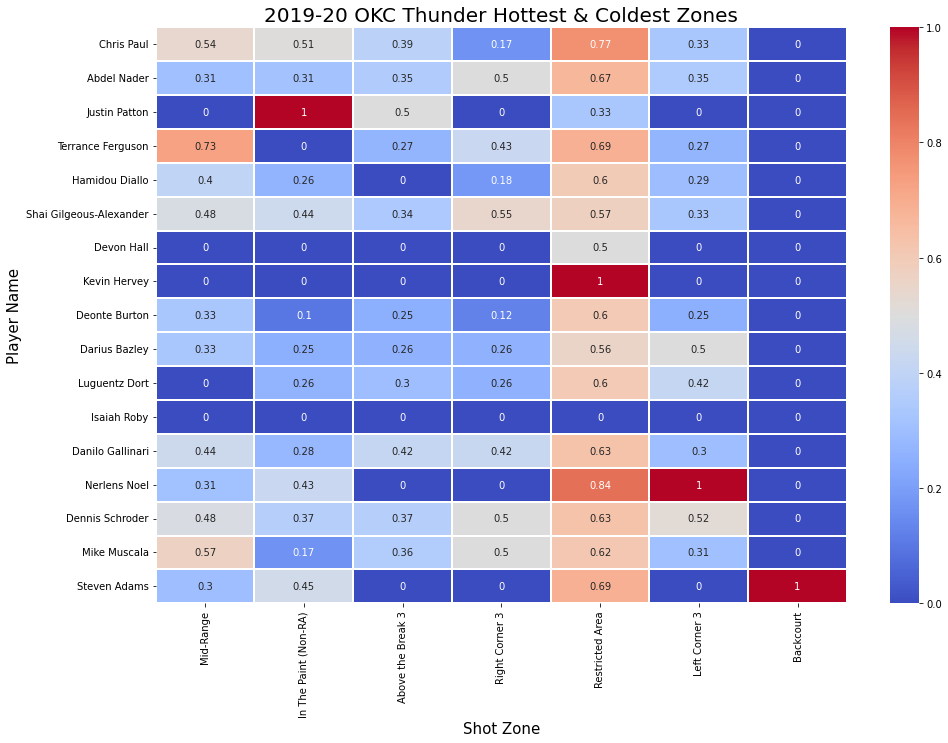

In [ ]:
# heatmap to show who made shots from certain areas the most

heatfig = plt.figure()
hmax=heatfig.add_axes([0,0,2,2])
sns.heatmap(OKCdf,cmap='coolwarm',linecolor='white',linewidth=1,annot=True,ax=hmax)
hmax.set_xlabel('Shot Zone',fontsize=15)
hmax.set_ylabel('Player Name',fontsize=15)
hmax.set_title("2019-20 OKC Thunder Hottest & Coldest Zones",fontsize=20)
plt.show()